In [25]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

## load BMP120 data from .MAT (produced using loadPeriodTemp_mod_speed_griddedCHECKPATH.m on scimaths ocean 

In [26]:
x = loadmat('/home/z3526974/Work/data/Shelf_moorings/BMP120/BMP_temp_gridded_all.mat')
TIME = x['time']
temp = x['temp_gridded']
depth = x['vert_grid']
#for some reason, python isn't liking the time and depth arrays from the .mat - so check the values in matlab and then reconstruct them below.
time = pd.date_range(start='30/3/2011 08:35:00', end='14/11/2019 06:40:00',freq='5min')
depth=np.arange(0,111,1) 
depth

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110])

## Right, so that's the data loaded in as numpy arrays, now to construct an Xarray DataArray

In [27]:
ds = xr.Dataset( {'temperature':(['time','depth'], temp)}, coords = {'time':time,'depth':depth})
BMP120_temp_1D = ds.resample(time='1D').mean()
BMP120_temp_1D

<xarray.Dataset>
Dimensions:      (depth: 111, time: 3152)
Coordinates:
  * time         (time) datetime64[ns] 2011-03-30 2011-03-31 ... 2019-11-14
  * depth        (depth) int64 0 1 2 3 4 5 6 7 ... 104 105 106 107 108 109 110
Data variables:
    temperature  (time, depth) float64 nan nan nan nan ... 15.25 15.19 15.13

## Plot to check visually

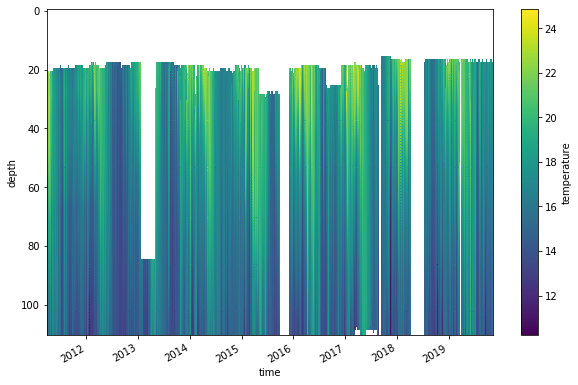

In [28]:
BMP120_temp_1D.temperature.plot(x='time',yincrease = False)

Stored 'BMP_120_surf' (DataArray)


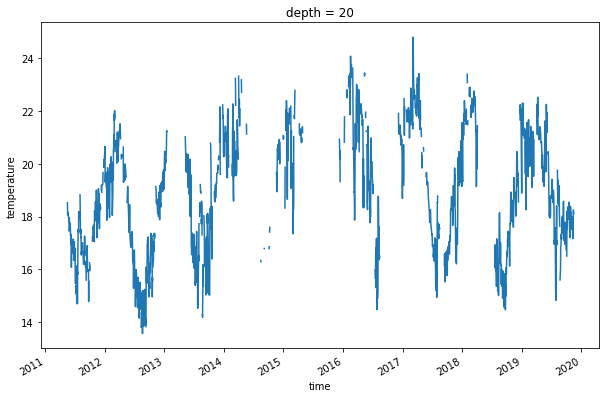

In [29]:
BMP120_temp_1D.temperature.sel(depth=20).plot()
BMP_120_surf = BMP120_temp_1D.temperature.sel(depth=20)
%store BMP_120_surf 

In [30]:
%store -r
BMP_T

<xarray.DataArray 'analysed_sst' (time: 9330)>
array([14.86499 , 14.899994, 14.759979, ..., 22.450012, 22.420013, 22.194977],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-09-01T12:00:00 ... 2017-03-17T12:00:00

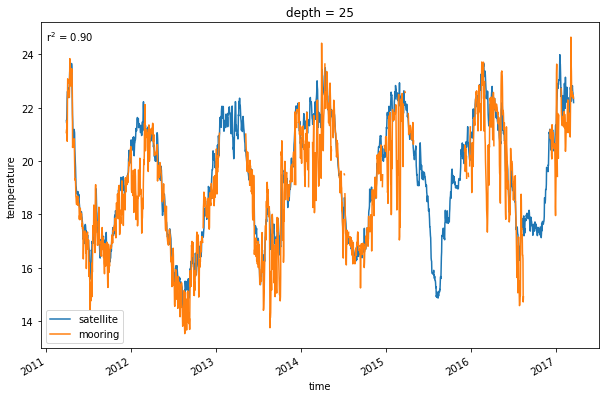

In [31]:
BMP_common_time = BMP_T.sel(time=slice(BMP120_temp_1D.time[0],BMP_T.time[-1]))
BMP_moored_common = BMP120_temp_1D.sel(time=slice(BMP120_temp_1D.time[0],BMP_T.time[-1]))

satellite = BMP_common_time.plot(label='satellite')
moored = BMP_moored_common.temperature.sel(depth=25).plot(label = 'mooring')
plt.text('2011,01,01',24.5,'r$^2$ = 0.90')
plt.legend()

In [32]:
df_BMP_sat = pd.DataFrame(data=BMP_common_time)
df_BMP_moored = pd.DataFrame(data=BMP_moored_common.temperature.sel(depth=25))

df_BMP_sat.corrwith(df_BMP_moored)

0    0.903822
dtype: float64

## load Sydney140 Data

In [33]:
x = loadmat('/home/z3526974/Work/data/Shelf_moorings/SYD140/SYD140_temp_gridded_all.mat')
TIME = x['time']
temp = x['temp_gridded']
depth = x['vert_grid'] #these dont seem to be real depth!! need to consult Amandine.
#for some reason, python isn't liking the time and depth arrays from the .mat - so check the values in matlab and then reconstruct them below.
time = pd.date_range(start='25/6/2008 10:00:00', end='26/11/2019 06:45:00',freq='5min')
depth=np.arange(0,111,1) 

In [34]:
ds = xr.Dataset( {'temperature':(['time','depth'], temp)}, coords = {'time':time,'depth':depth})
SYD140_temp_1D = ds.resample(time='1D').mean()
SYD140_temp_1D

<xarray.Dataset>
Dimensions:      (depth: 111, time: 4172)
Coordinates:
  * time         (time) datetime64[ns] 2008-06-25 2008-06-26 ... 2019-11-26
  * depth        (depth) int64 0 1 2 3 4 5 6 7 ... 104 105 106 107 108 109 110
Data variables:
    temperature  (time, depth) float64 nan nan nan nan ... 15.14 15.11 15.09

## plot SYD140 to check visually

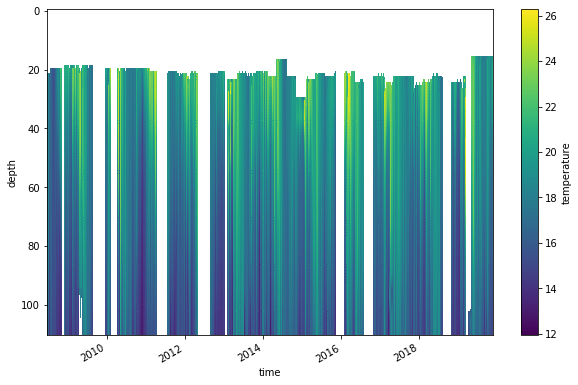

In [35]:
SYD140_temp_1D.temperature.plot(x='time',yincrease = False)

In [36]:
%store -r
SYD_T

<xarray.DataArray 'analysed_sst' (time: 9330)>
array([16.970001, 16.98999 , 17.809998, ..., 24.01001 , 23.850006, 23.639984],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-09-01T12:00:00 ... 2017-03-17T12:00:00

Stored variables and their in-db values:
BMP_120_surf                   -> <xarray.DataArray 'temperature' (time: 3152)>
arra
BMP_T                          -> <xarray.DataArray 'analysed_sst' (time: 9330)>
arr
CH_T                           -> <xarray.DataArray 'analysed_sst' (time: 9330)>
arr
EKE_S_filtered                 -> TIME
1993-01-01   NaN
1993-01-02   NaN
1993-01-03 
SYD140_surface_raw             -> TIME
2008-06-25    18.705777
2008-06-26    18.7113
SYD_T                          -> <xarray.DataArray 'analysed_sst' (time: 9330)>
arr


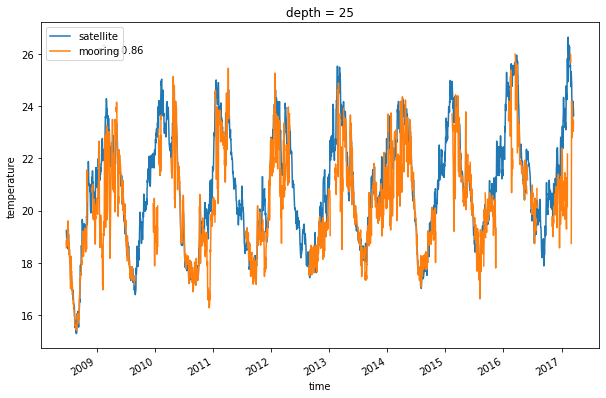

In [37]:
SYD_common_time = SYD_T.sel(time=slice(SYD140_temp_1D.time[0],SYD_T.time[-1]))
SYD_moored_common = SYD140_temp_1D.sel(time=slice(SYD140_temp_1D.time[0],SYD_T.time[-1]))

satellite = SYD_common_time.plot(label='satellite')
moored = SYD_moored_common.temperature.sel(depth=25).plot(label = 'mooring')
plt.text('2009,01,01',26,'r$^2$ = 0.86')
plt.legend()

#SYD140_moored 
%store 

In [38]:
df_SYD_sat = pd.DataFrame(data=SYD_common_time)
df_SYD_moored = pd.DataFrame(data=SYD_moored_common.temperature.sel(depth=25))

df_SYD_sat.corrwith(df_SYD_moored)

0    0.859843
dtype: float64

## Load CH100 data

x = loadmat('/home/z3526974/Work/data/Shelf_moorings/CH100/CH100_temp_gridded_all.mat')
TIME = x['time']
temp = x['temp_gridded']
depth = x['vert_grid'] #these dont seem to be real depth!! need to consult Amandine.
#for some reason, python isn't liking the time and depth arrays from the .mat - so check the values in matlab and then reconstruct them below.
time = pd.date_range(start='15/8/2009 11:35:00', end='16/10/2019 07:30:00',freq='5min')
depth=np.arange(0,111,1) 

In [44]:
ds = xr.Dataset( {'temperature':(['time','depth'], temp)}, coords = {'time':time,'depth':depth})
CH100_temp_1D = ds.resample(time='1D').mean()
CH100_temp_1D

<xarray.Dataset>
Dimensions:      (depth: 111, time: 4172)
Coordinates:
  * time         (time) datetime64[ns] 2008-06-25 2008-06-26 ... 2019-11-26
  * depth        (depth) int64 0 1 2 3 4 5 6 7 ... 104 105 106 107 108 109 110
Data variables:
    temperature  (time, depth) float64 nan nan nan nan ... 15.14 15.11 15.09

## Plot CH100 to check visually

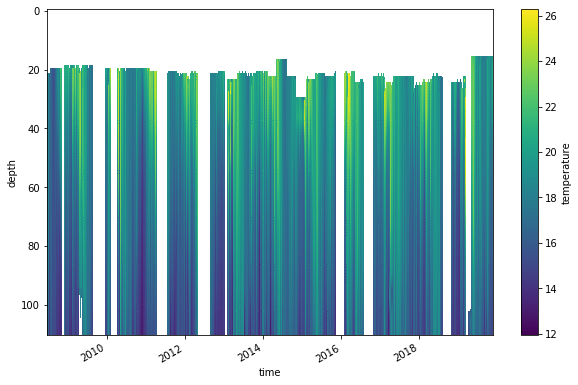

In [45]:
CH100_temp_1D.temperature.plot(x='time',yincrease = False)

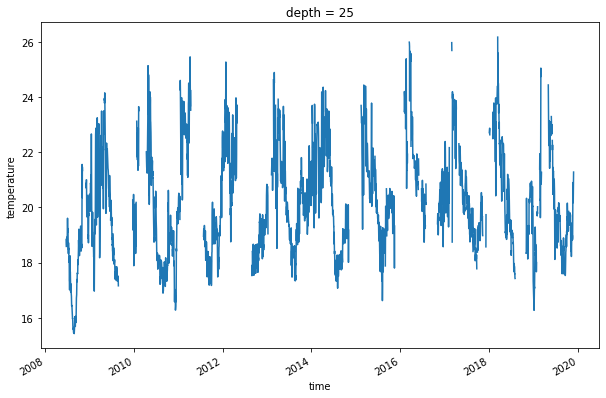

In [47]:
CH100_temp_1D.temperature.sel(depth=25).plot()

## Plot depth averaged temperature

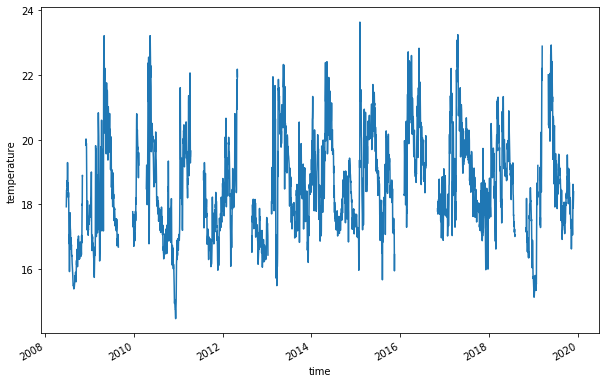

In [48]:
CH100_temp_1D.temperature.isel(depth=slice(15,90)).mean("depth").plot()

## Load magic of satellite data from Mooring_SST_analysis notebook

In [49]:
%store -r
CH_T

<xarray.DataArray 'analysed_sst' (time: 9330)>
array([19.985016, 20.005005, 20.014984, ..., 25.860016, 26.595001, 26.519989],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-09-01T12:00:00 ... 2017-03-17T12:00:00

In [50]:
CH_common_time = CH_T.sel(time=slice(CH100_temp_1D.time[0],CH_T.time[-1]))
CH_moored_common = CH100_temp_1D.sel(time=slice(CH100_temp_1D.time[0],CH_T.time[-1]))

Text(0.5, 1.0, 'CH100, depth 15m')

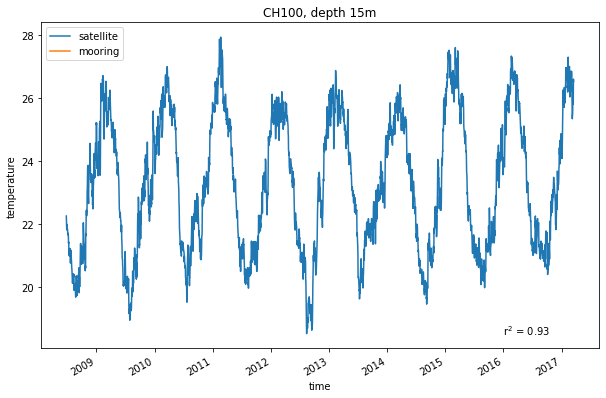

In [51]:
satellite = CH_common_time.plot(label='satellite')
moored = CH_moored_common.temperature.sel(depth=15).plot(label = 'mooring')
plt.text('2016,01,01',18.5,'r$^2$ = 0.93')
plt.legend()
plt.title('CH100, depth 15m')

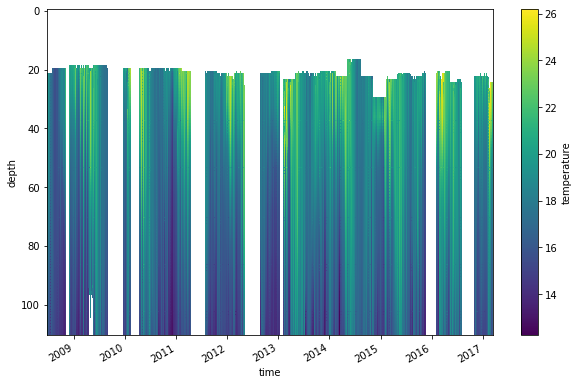

In [52]:
CH_moored_common.temperature.plot(x='time',yincrease = False)

## Convert to pandas to perform correlation

In [33]:
df_CH_sat = pd.DataFrame(data=CH_common_time)
df_CH_moored = pd.DataFrame(data=CH_moored_common.temperature.sel(depth=15))

In [34]:
df_CH_sat.corrwith(df_CH_moored)

0    0.926645
dtype: float64

nan

AttributeError: 'Series' object has no attribute 'info'

count    1403.000000
mean       22.670303
std         1.926655
min        18.199962
25%        21.009339
50%        22.535076
75%        24.376153
max        27.452082
Name: temperature, dtype: float64